In [1]:
# Importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import OneHotEncoder

# Loading the dataset into a Pandas DataFrame

In [2]:
df = pd.read_csv("Data/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv"
)

In [3]:
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Asian,RACE,RACEASN
53388,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Hawaiian/Pacific Islander,RACE,RACEHPI
53389,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
53390,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,2 or more races,RACE,RACE2PLUS


 # Summary of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [5]:
#Dropping the unnecessary columns in data
df = df.drop(['Low_Confidence_Limit','High_Confidence_Limit ', 'Total', 'Data_Value_Alt', 'YearEnd','Topic','Class','Datasource','Data_Value_Unit','QuestionID','ClassID','TopicID','DataValueTypeID','Data_Value_Type','Data_Value_Footnote_Symbol','Data_Value_Footnote','StratificationCategoryId1','StratificationID1'],1);
df = df.drop(['GeoLocation', 'Question', 'StratificationCategory1', 'Stratification1', 'Gender'],1)

C:\Users\kurtu\AppData\Local\Temp\ipykernel_22408\3124549031.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['Low_Confidence_Limit','High_Confidence_Limit ', 'Total', 'Data_Value_Alt', 'YearEnd','Topic','Class','Datasource','Data_Value_Unit','QuestionID','ClassID','TopicID','DataValueTypeID','Data_Value_Type','Data_Value_Footnote_Symbol','Data_Value_Footnote','StratificationCategoryId1','StratificationID1'],1);
C:\Users\kurtu\AppData\Local\Temp\ipykernel_22408\3124549031.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['GeoLocation', 'Question', 'StratificationCategory1', 'Stratification1', 'Gender'],1)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YearStart       53392 non-null  int64  
 1   LocationAbbr    53392 non-null  object 
 2   LocationDesc    53392 non-null  object 
 3   Data_Value      48346 non-null  float64
 4   Sample_Size     48346 non-null  float64
 5   Age(years)      11438 non-null  object 
 6   Education       7628 non-null   object 
 7   Income          13349 non-null  object 
 8   Race/Ethnicity  15256 non-null  object 
 9   LocationID      53392 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 4.1+ MB


In [7]:
#subseting the data to be able to analyse according to specific column.
df=df.dropna(subset=['Income'])
#df=df.dropna(subset=['Education'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13349 entries, 13 to 53383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YearStart       13349 non-null  int64  
 1   LocationAbbr    13349 non-null  object 
 2   LocationDesc    13349 non-null  object 
 3   Data_Value      13349 non-null  float64
 4   Sample_Size     13349 non-null  float64
 5   Age(years)      0 non-null      object 
 6   Education       0 non-null      object 
 7   Income          13349 non-null  object 
 8   Race/Ethnicity  0 non-null      object 
 9   LocationID      13349 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 1.1+ MB


## Standardizing the column names

In [8]:
#creating a function to be able to lower all letters in columns
def lower_case_column_names(df):
    df.columns=[i.lower() for i in df.columns]
    return df

In [9]:
df=lower_case_column_names(df)
df

,yearstart,locationabbr,locationdesc,data_value,sample_size,age(years),education,income,race/ethnicity,locationid
13,2011,AL,Alabama,38.5,1112.0,NaN,NaN,"Less than $15,000",NaN,1
14,2011,AL,Alabama,34.8,1367.0,NaN,NaN,"$15,000 - $24,999",NaN,1
15,2011,AL,Alabama,35.8,757.0,NaN,NaN,"$25,000 - $34,999",NaN,1
16,2011,AL,Alabama,32.3,861.0,NaN,NaN,"$35,000 - $49,999",NaN,1
17,2011,AL,Alabama,34.1,785.0,NaN,NaN,"$50,000 - $74,999",NaN,1
...,...,...,...,...,...,...,...,...,...,...
53379,2016,VI,Virgin Islands,28.9,154.0,NaN,NaN,"$25,000 - $34,999",NaN,78
53380,2016,VI,Virgin Islands,20.9,158.0,NaN,NaN,"$35,000 - $49,999",NaN,78
53381,2016,VI,Virgin Islands,29.8,159.0,NaN,NaN,"$50,000 - $74,999",NaN,78
53382,2016,VI,Virgin Islands,13.3,212.0,NaN,NaN,"$75,000 or greater",NaN,78


In [10]:
#checking the data types to see if any correction needed
df.dtypes

yearstart           int64
locationabbr       object
locationdesc       object
data_value        float64
sample_size       float64
age(years)         object
education          object
income             object
race/ethnicity     object
locationid          int64
dtype: object

## Checking for duplicate & missing values

In [11]:
#Checking duplicate variable
print(df.duplicated().sum())

6


In [12]:
#dropping duplicate data
df = df.drop_duplicates()

In [13]:
df.isna()

,yearstart,locationabbr,locationdesc,data_value,sample_size,age(years),education,income,race/ethnicity,locationid
13,False,False,False,False,False,True,True,False,True,False
14,False,False,False,False,False,True,True,False,True,False
15,False,False,False,False,False,True,True,False,True,False
16,False,False,False,False,False,True,True,False,True,False
17,False,False,False,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...
53379,False,False,False,False,False,True,True,False,True,False
53380,False,False,False,False,False,True,True,False,True,False
53381,False,False,False,False,False,True,True,False,True,False
53382,False,False,False,False,False,True,True,False,True,False


In [14]:
#checking for any high percentage of missing value in columns
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

yearstart           0.0
locationabbr        0.0
locationdesc        0.0
data_value          0.0
sample_size         0.0
age(years)        100.0
education         100.0
income              0.0
race/ethnicity    100.0
locationid          0.0
dtype: float64

In [15]:
#dropping columns with high volume of missing values
df = df.drop(['age(years)'],1)

C:\Users\kurtu\AppData\Local\Temp\ipykernel_22408\2674066669.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['age(years)'],1)


## Going by Alex's & Peter's new advice we would drop age, education, gender, income and race/ethnicity.

## So we can compare the 

## Removing outliers

In [16]:
#creating function to remove outliers by using interquartile function
def remove_outliers(df):
    for col in df.select_dtypes(include=np.number).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df.drop(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index, inplace=True)

In [17]:
remove_outliers(df)
df

,yearstart,locationabbr,locationdesc,data_value,sample_size,education,income,race/ethnicity,locationid
13,2011,AL,Alabama,38.5,1112.0,NaN,"Less than $15,000",NaN,1
14,2011,AL,Alabama,34.8,1367.0,NaN,"$15,000 - $24,999",NaN,1
15,2011,AL,Alabama,35.8,757.0,NaN,"$25,000 - $34,999",NaN,1
16,2011,AL,Alabama,32.3,861.0,NaN,"$35,000 - $49,999",NaN,1
17,2011,AL,Alabama,34.1,785.0,NaN,"$50,000 - $74,999",NaN,1
...,...,...,...,...,...,...,...,...,...
53379,2016,VI,Virgin Islands,28.9,154.0,NaN,"$25,000 - $34,999",NaN,78
53380,2016,VI,Virgin Islands,20.9,158.0,NaN,"$35,000 - $49,999",NaN,78
53381,2016,VI,Virgin Islands,29.8,159.0,NaN,"$50,000 - $74,999",NaN,78
53382,2016,VI,Virgin Islands,13.3,212.0,NaN,"$75,000 or greater",NaN,78


## Standardizing the text in the data

In [18]:
#Creating a function for standardizing the string data by lowering all the letters
def standardize_text(df):
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.lower()

In [19]:
standardize_text(df)
df

,yearstart,locationabbr,locationdesc,data_value,sample_size,education,income,race/ethnicity,locationid
13,2011,al,alabama,38.5,1112.0,NaN,"less than $15,000",NaN,1
14,2011,al,alabama,34.8,1367.0,NaN,"$15,000 - $24,999",NaN,1
15,2011,al,alabama,35.8,757.0,NaN,"$25,000 - $34,999",NaN,1
16,2011,al,alabama,32.3,861.0,NaN,"$35,000 - $49,999",NaN,1
17,2011,al,alabama,34.1,785.0,NaN,"$50,000 - $74,999",NaN,1
...,...,...,...,...,...,...,...,...,...
53379,2016,vi,virgin islands,28.9,154.0,NaN,"$25,000 - $34,999",NaN,78
53380,2016,vi,virgin islands,20.9,158.0,NaN,"$35,000 - $49,999",NaN,78
53381,2016,vi,virgin islands,29.8,159.0,NaN,"$50,000 - $74,999",NaN,78
53382,2016,vi,virgin islands,13.3,212.0,NaN,"$75,000 or greater",NaN,78


# Data split for Numerical and Categorical variables

In [20]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
numerical = df[numerical_columns]
numerical

,yearstart,data_value,sample_size,locationid
13,2011,38.5,1112.0,1
14,2011,34.8,1367.0,1
15,2011,35.8,757.0,1
16,2011,32.3,861.0,1
17,2011,34.1,785.0,1
...,...,...,...,...
53379,2016,28.9,154.0,78
53380,2016,20.9,158.0,78
53381,2016,29.8,159.0,78
53382,2016,13.3,212.0,78


In [21]:
numerical = numerical.fillna(numerical.mean())
numerical

,yearstart,data_value,sample_size,locationid
13,2011,38.5,1112.0,1
14,2011,34.8,1367.0,1
15,2011,35.8,757.0,1
16,2011,32.3,861.0,1
17,2011,34.1,785.0,1
...,...,...,...,...
53379,2016,28.9,154.0,78
53380,2016,20.9,158.0,78
53381,2016,29.8,159.0,78
53382,2016,13.3,212.0,78


In [22]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical = df[categorical_columns]
categorical

,locationabbr,locationdesc,education,income,race/ethnicity
13,al,alabama,NaN,"less than $15,000",NaN
14,al,alabama,NaN,"$15,000 - $24,999",NaN
15,al,alabama,NaN,"$25,000 - $34,999",NaN
16,al,alabama,NaN,"$35,000 - $49,999",NaN
17,al,alabama,NaN,"$50,000 - $74,999",NaN
...,...,...,...,...,...
53379,vi,virgin islands,NaN,"$25,000 - $34,999",NaN
53380,vi,virgin islands,NaN,"$35,000 - $49,999",NaN
53381,vi,virgin islands,NaN,"$50,000 - $74,999",NaN
53382,vi,virgin islands,NaN,"$75,000 or greater",NaN


In [23]:
categorical

,locationabbr,locationdesc,education,income,race/ethnicity
13,al,alabama,NaN,"less than $15,000",NaN
14,al,alabama,NaN,"$15,000 - $24,999",NaN
15,al,alabama,NaN,"$25,000 - $34,999",NaN
16,al,alabama,NaN,"$35,000 - $49,999",NaN
17,al,alabama,NaN,"$50,000 - $74,999",NaN
...,...,...,...,...,...
53379,vi,virgin islands,NaN,"$25,000 - $34,999",NaN
53380,vi,virgin islands,NaN,"$35,000 - $49,999",NaN
53381,vi,virgin islands,NaN,"$50,000 - $74,999",NaN
53382,vi,virgin islands,NaN,"$75,000 or greater",NaN


# One-Hot Encoding for Categorical variables


In [24]:
categorical.columns

Index(['locationabbr', 'locationdesc', 'education', 'income',
       'race/ethnicity'],
      dtype='object')

In [25]:
#income
in_map = {'less than $15,000':0, '$15,000 - $24,999':1, '$25,000 - $34,999':2,'$35,000 - $49,999':3, '$50,000 - $74,999':4, 
          '$75,000 or greater':5, 'data not reported':6}
in_map
df['income'] = df['income'].map(in_map)

In [26]:
#education
ed_map = {'less than high school': 0, 'high school graduate':1, 'some college or technical school':2,'college graduate':3}
ed_map
df['education'] = df['education'].map(ed_map)

In [27]:
#race/ethnicity
rc_map = {'non-hispanic white': 0, 'non-hispanic black':1, 'hispanic':2,'asian':3, 'hawaiian/pacific islander':4,
       'american indian/alaska native':5, '2 or more races':6, 'other':7}
rc_map
df['race/ethnicity'] = df['race/ethnicity'].map(rc_map)

In [28]:
df

,yearstart,locationabbr,locationdesc,data_value,sample_size,education,income,race/ethnicity,locationid
13,2011,al,alabama,38.5,1112.0,NaN,0,NaN,1
14,2011,al,alabama,34.8,1367.0,NaN,1,NaN,1
15,2011,al,alabama,35.8,757.0,NaN,2,NaN,1
16,2011,al,alabama,32.3,861.0,NaN,3,NaN,1
17,2011,al,alabama,34.1,785.0,NaN,4,NaN,1
...,...,...,...,...,...,...,...,...,...
53379,2016,vi,virgin islands,28.9,154.0,NaN,2,NaN,78
53380,2016,vi,virgin islands,20.9,158.0,NaN,3,NaN,78
53381,2016,vi,virgin islands,29.8,159.0,NaN,4,NaN,78
53382,2016,vi,virgin islands,13.3,212.0,NaN,5,NaN,78


# Ploting distributions of numerical data

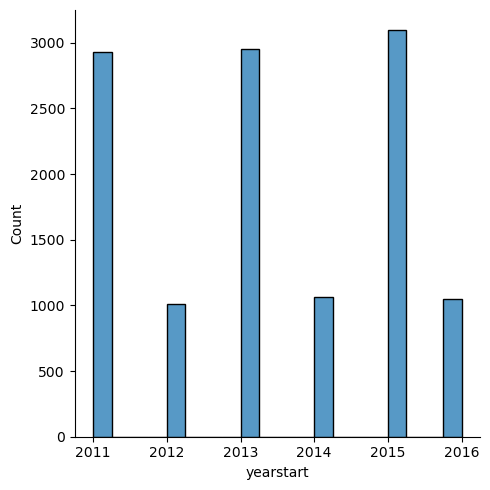

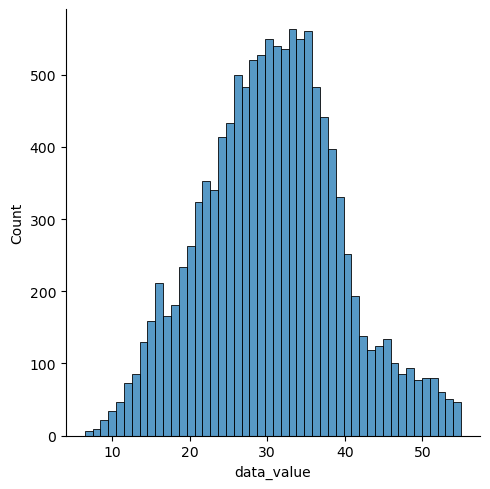

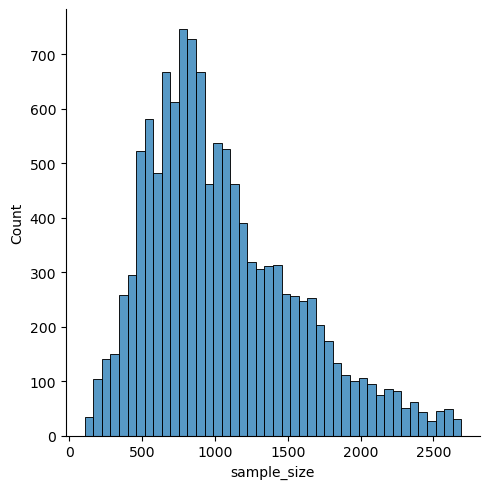

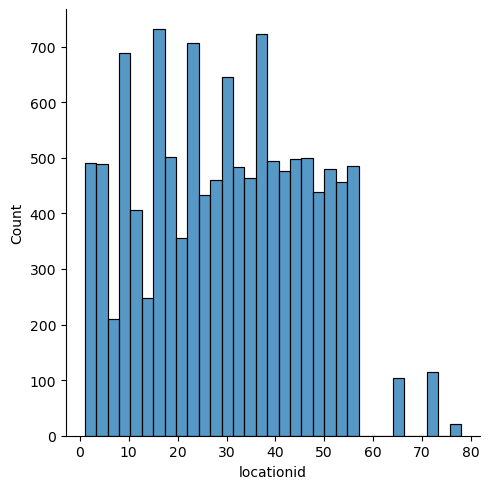

In [29]:
for col in numerical.columns:
    sns.displot(numerical[col])
    plt.show()

In [30]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12100 entries, 13 to 53383
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yearstart    12100 non-null  int64  
 1   data_value   12100 non-null  float64
 2   sample_size  12100 non-null  float64
 3   locationid   12100 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 472.7 KB


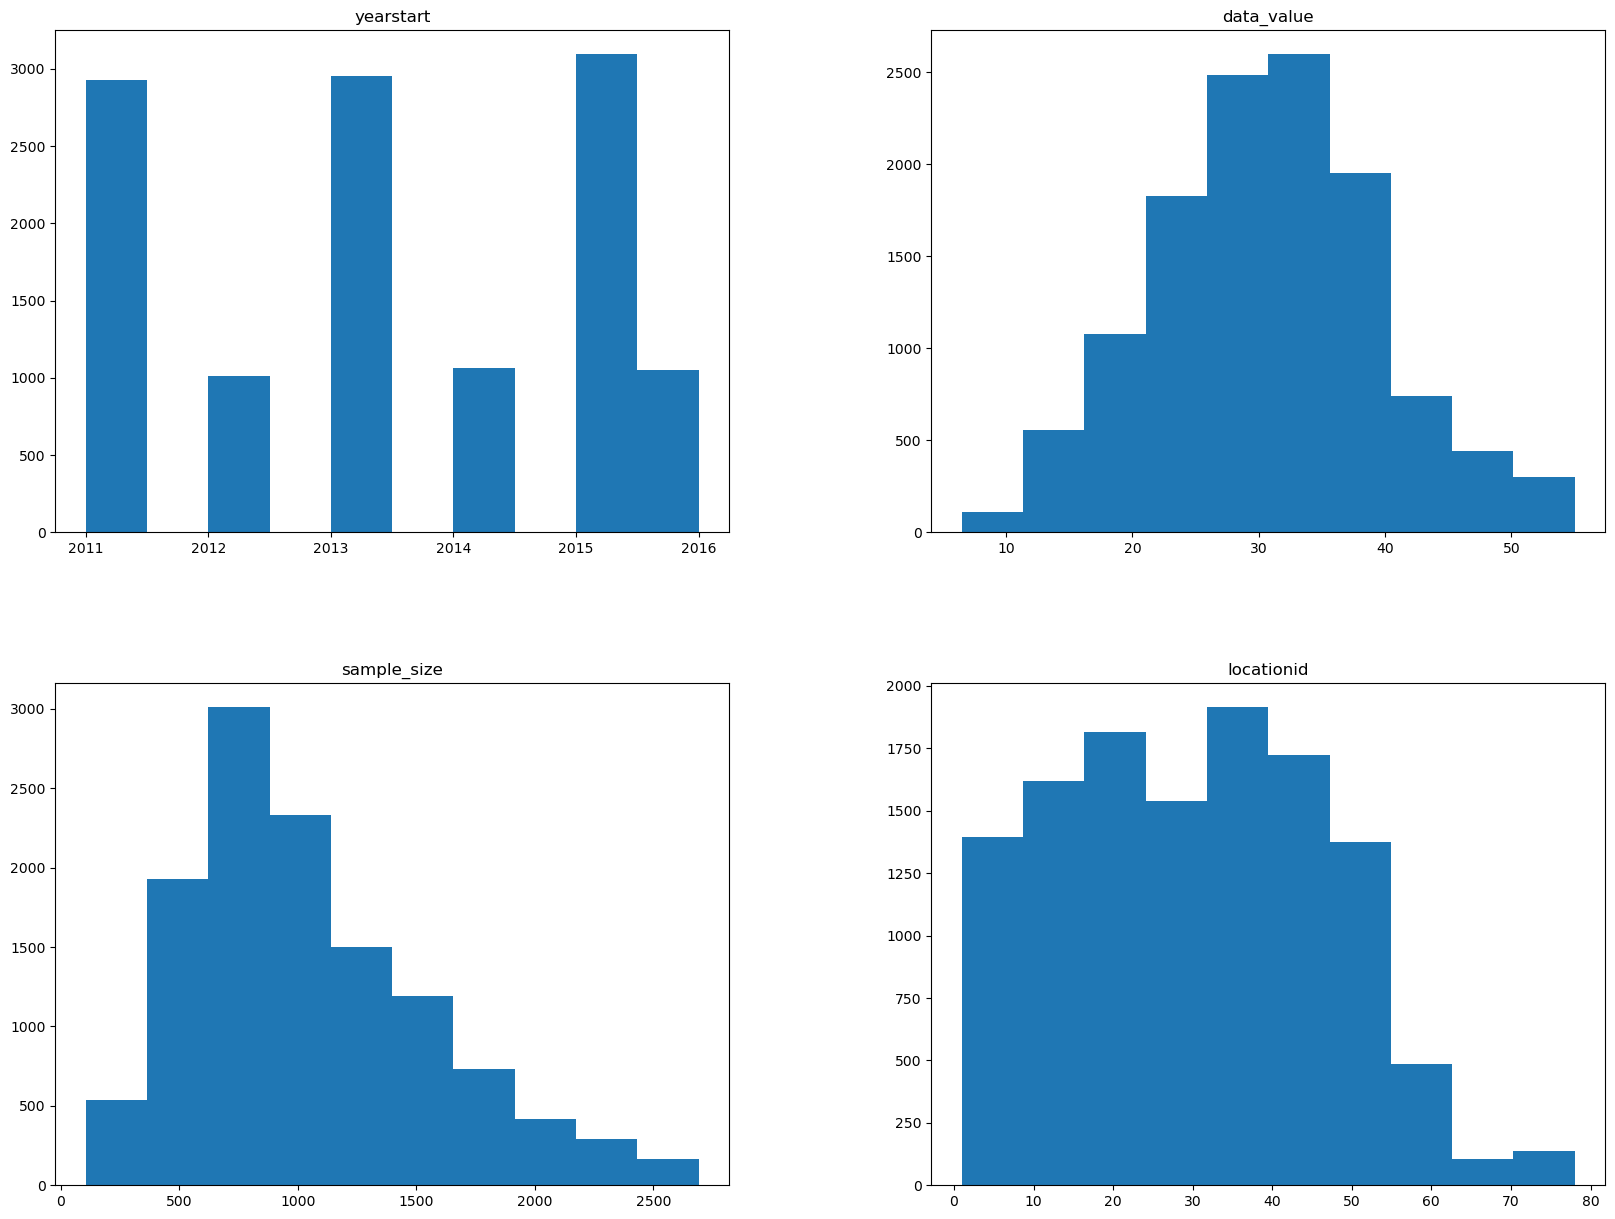

In [31]:
numerical.hist(figsize=(20,15), grid=False)
plt.show()

# Plot relationships between Numerical variables

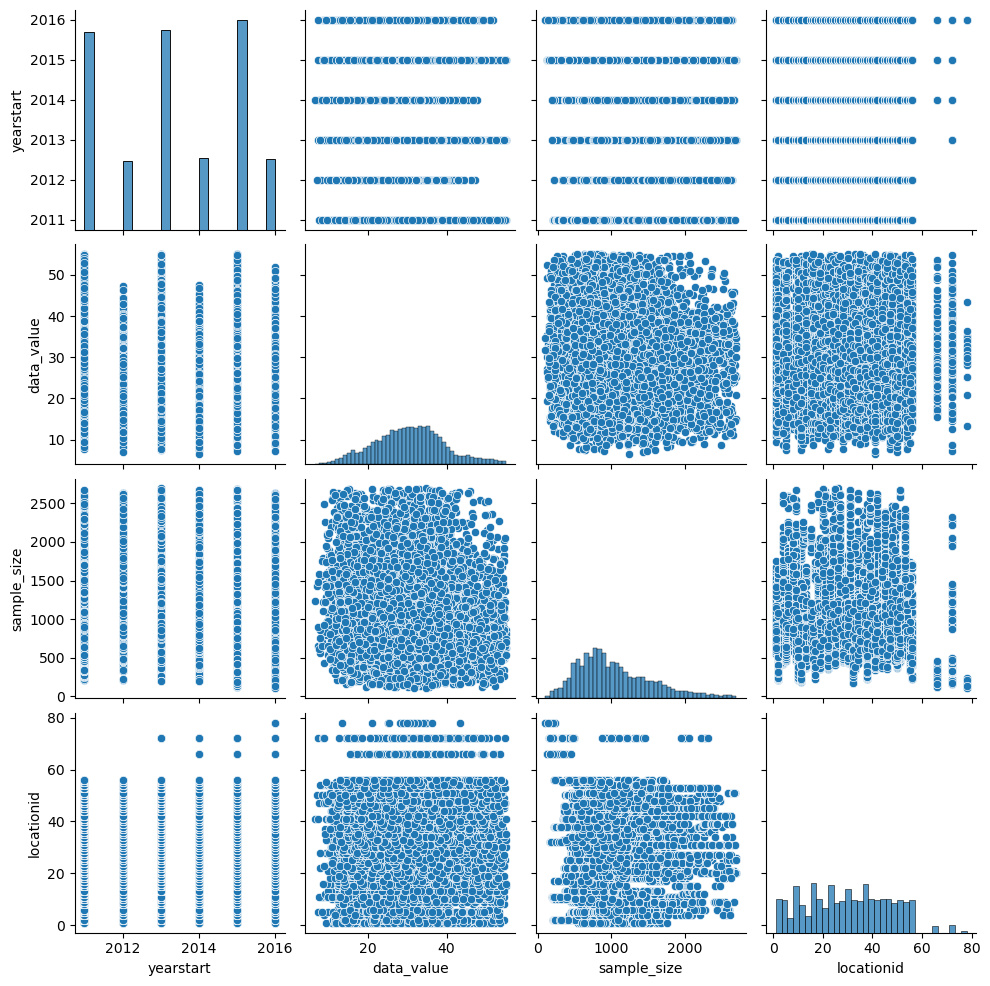

In [32]:
sns.pairplot(numerical)

In [33]:
#checking correlation between numerical variables
numerical.corr()

,yearstart,data_value,sample_size,locationid
yearstart,1.000000,0.025113,-0.146583,0.048951
data_value,0.025113,1.000000,-0.064852,0.002267
sample_size,-0.146583,-0.064852,1.000000,0.014821
locationid,0.048951,0.002267,0.014821,1.000000


<AxesSubplot:>

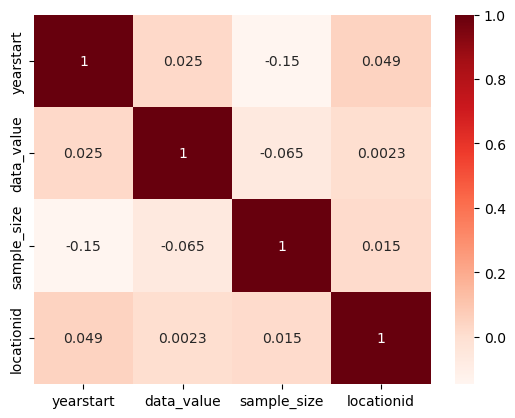

In [34]:
corr = numerical.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
        annot=True, cmap='Reds')

# X/Y Split

In [35]:
X = df[['yearstart','income', 'locationid']]
#X = df[['yearstart','education', 'locationid']]
y = numerical['data_value']

# Train/Test Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,yearstart,income,locationid
10110,2014,6,18
53161,2016,0,50
1848,2013,0,4


In [37]:
std_scaler=StandardScaler().fit(X_train) 

X_train_scaled=std_scaler.transform(X_train)

In [38]:
X_test_scaled=std_scaler.transform(X_test)

In [39]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 0.41516363  1.54497207 -0.71375069]
 [ 1.59636481 -1.45248844  1.20819124]
 [-0.17543696 -1.45248844 -1.55460028]
 ...
 [-0.76603756  0.04624182  1.26825193]
 [-0.17543696  0.54581857  0.00697753]
 [-1.35663815 -1.45248844 -1.13417549]]
--------
[[-1.35663815 -0.95291169  1.20819124]
 [-0.17543696 -1.45248844 -0.65369   ]
 [-1.35663815 -0.45333494 -0.23326521]
 ...
 [-1.35663815 -1.45248844  0.30728096]
 [-1.35663815 -0.45333494 -0.47350795]
 [ 1.59636481 -0.45333494  0.48746302]]


# Creating the Model

In [40]:
#creating OLS model
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             data_value   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     38.75
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           7.28e-25
Time:                        11:45:42   Log-Likelihood:                -30509.
No. Observations:                8470   AIC:                         6.103e+04
Df Residuals:                    8466   BIC:                         6.105e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.7707      0.096    319.061      0.0

In [41]:
predictions_test

array([31.45118602, 32.18353079, 30.91055559, ..., 31.93450954,
       30.90467796, 31.60951793])

In [42]:
#display adjusted R-squared
print(model.rsquared_adj)

0.013196609111306046


# Model Fitting

In [43]:
#creating linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Model Parameters

In [44]:
model.coef_

array([ 0.13626589, -0.50536464,  0.00146941])

In [45]:
model.intercept_

-242.14762016358392

In [46]:
model.score(X_test_scaled,y_test)

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-943.245724828944

## Model Predictions 

In [47]:
y_pred=model.predict(X_test_scaled)  

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [48]:
y_test

31238    24.9
10665    11.6
15035    18.3
20880    37.7
37297    16.6
         ... 
45062    28.8
16940    39.1
21749    28.7
12232    37.1
51326    38.4
Name: data_value, Length: 3630, dtype: float64

In [49]:
y_pred

array([-241.84914047, -241.43845048, -242.10372698, ..., -241.59799585,
       -242.10407999, -241.70027437])

In [50]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

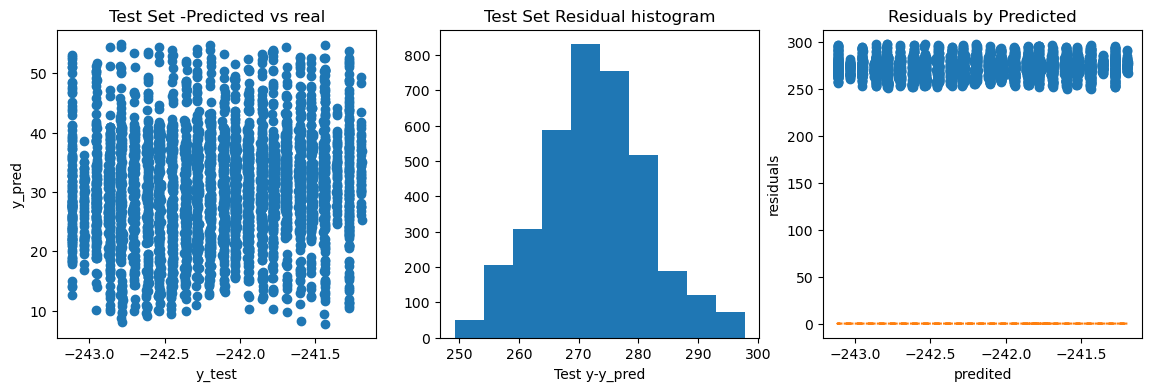

In [58]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<AxesSubplot:xlabel='y_test', ylabel='y_pred'>

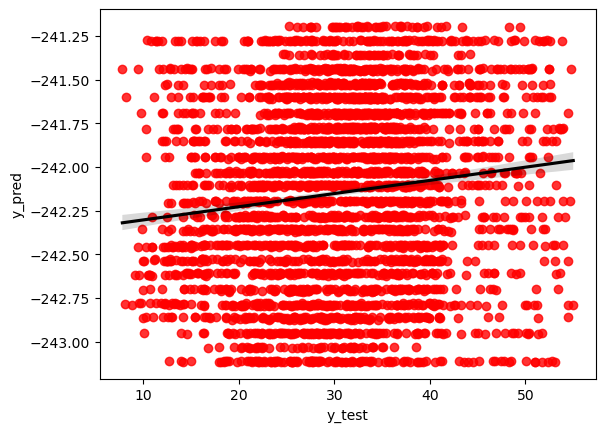

In [52]:
sns.regplot(x='y_test',y='y_pred', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

# Evaluating the model using mean squared error and R-squared


In [53]:
mse = mse(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2= 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)


Mean Squared Error: 74417.32375926035
R-squared: -943.245724828944
Adjusted R-squared: -944.0269540552229


#### Feature Importance

In [54]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [55]:
features_importances

,Attribute,Importance
1,income,0.505365
0,yearstart,0.136266
2,locationid,0.001469


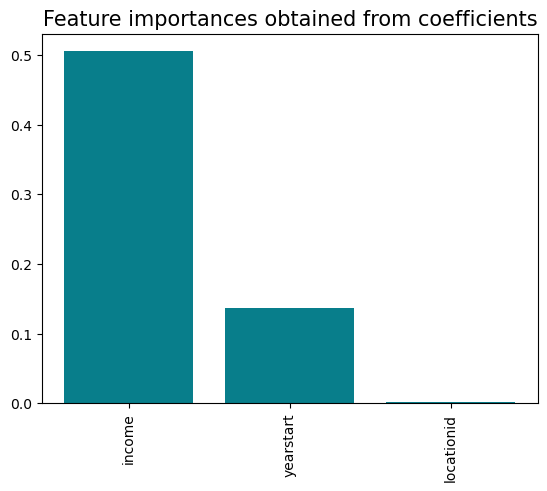

In [56]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=15)
plt.xticks(rotation='vertical')
plt.show()

In [57]:
#saving cleaned data
df.to_csv("Data/Nutrition__Physical_Activity__and_Obesity_cleaned_data.csv")